# Day 1: Logistic Regression
We will apply logistic regression to binary classification problems. We will first jump in quickly to use sklearn (scikit-learn) to build a logistic regression model on a toy dataset. After this, we will work with a few datasets, some randomly generated (i.e. artificial) and some real-life data.

## Round 0: Jumping in.

In this mock example, we will show how trivial it is to get started with scikit-learn to perform logistic regression on a toy dataset. 

First, some imports.

In [200]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score

import pandas as pd
from patsy import dmatrices

import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

import seaborn as sns
sns.set(style="white")

In [159]:
from __future__ import print_function

The __future__ module is a real Python module. You will often see constructs from __future__ import division. What do you think this line does? 

In the above we imported a whole bunch of stuff, some of which we will not need to use right now. First, a very small hand-crafted example to get the bearings.

In [257]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
# X = [(1, 2, 2), (2, 3, 7), (1, 3, 1), (4, 5, 20)]
# X is the list of features of the training examples.
#print(len(X))
# Gives number of training examples.

#print(len(X[0]))
#print (type(X[0]))
# number of features

y = [1, 0, 1, 1]

model = LogisticRegression() # model = Classifier()
model = model.fit(X, y)
model.score(X, y)

0.75

...and, we are up and running! We have trained our first logistic regression model! 

Here, X is the list of feature vectors, one for each training example. Also, y is the list of target variables, again, one for each training example. Note, that there are 4 training examples here.

The __score__ here is the "accuracy". Accuracy is one of many metrics (others are precision, recall, F1-score, etc.). Metrics help us understand how good (or bad) a model is performing. 

In this specific case, the accuracy is 3/4. What do you think the model is doing?

Let's play with the target variables some more: let's make all the target variables 1.


In [161]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = [1, 1, 1, 1]

model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Hmm... that went wrong! The calls went all the way up and then returned with an error that there needs to be samples of at least 2 classes. Next try...

In [259]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = [1, 0, 0, 1]

model = LogisticRegression()
model = model.fit(X, y)
print(model.score(X, y))
model.predict(X)

0.5


array([0, 1, 0, 1])

In [270]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = [1, 0, 1, 0]

model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

1.0

... and what does this model predict on the input (1,2)? On the input (3,4)?

In [271]:
model.predict([(2,2), (3, 4)])

array([0, 0])

While logistic regression predicts the class label for (new) samples, we can actually get more information as to the actual probabilities it assigns to a (sample, label) combo. For that, we need to use the method predict_proba

In [272]:
model.predict_proba([(2,2), (3, 4)])

array([[ 0.64611459,  0.35388541],
       [ 0.71421389,  0.28578611]])

#### Other metrics

The score reported by model.score is the accuracy of the classifier. What is the metric that we should be targeting or measuring our classifiers by?

The popular metrics are:
- Precision
- Recall 
- PR-AUC
- AUC (Area Under the ROC Curve)
- F1 score
- accuracy

Discuss the confusion matrix, and how these measures are computed. 
Link: https://en.wikipedia.org/wiki/Precision_and_recall

In [273]:
y_pred = model.predict(X[:3])
y_true = y[:3]

y_pred_prob = model.predict_proba(X[:3])[:,0]

print(y_true) 
print(y_pred)
print(y_pred_prob)

[1, 0, 1]
[1 0 1]
[ 0.49086206  0.60818552  0.45044619]


In [274]:
print(confusion_matrix(y_true, y_pred))

[[1 0]
 [0 2]]


In [275]:
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

1.0
1.0


In [276]:
print(log_loss(y_true, y_pred))

9.99200722163e-16


In [277]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
print(precision)
print(recall)
print(thresholds)

[ 0.66666667  0.5         0.          1.        ]
[ 1.   0.5  0.   0. ]
[ 0.45044619  0.49086206  0.60818552]


##### With a random target
In the following model, we will take a random target as y. This is essentially to demonstrate an use-case of np.random.randint.

In [278]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = np.random.randint(2, size = 4)
print(y)
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

[1 0 0 1]


0.5

##### Question to audience:

Debug this! 

### Plots
Visualization is a significant part of any data analysis activity. Here, we will use matplotlib for our plotting needs. A short example will indicate how to go about coloring points. For regression tasks, such as linear regression, we need use only one color, while for classification problems we would need to use multiple colors. Since most of this presentation will involve binary classification, we will use the two colors __red__ and __blue__.

Note that for actual logistic regression tasks, the training examples may have 1000s (or even millions) of features, and it is not feasible to visualize as we do below (there do exist techniques for dimension reduction such as t-SNE etc. in order to make visualization of the most interesting dimensions possible).

First, let's color all the points in X in a single color (say, red).

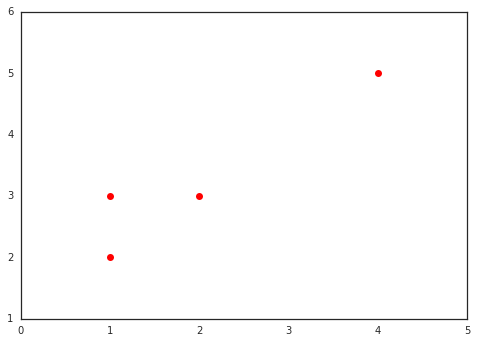

In [279]:
X1 = [i for (i,j) in X]
Y1 = [j for (i,j) in X]
plt.plot(X1, Y1, 'ro')

# Set up axes
x_min = np.min(X1) - 1
x_max = np.max(X1) + 1
y_min = np.min(Y1) - 1
y_max = np.max(Y1) + 1
plt.axis([x_min, x_max, y_min, y_max]) # Note the list/array of the min/max values here.
plt.show()

Now we proceed to color according to the category/labels of the input points.

In [280]:
a = np.array([1, 2])
b = np.array([3,4])
np.append(a, b)

array([1, 2, 3, 4])

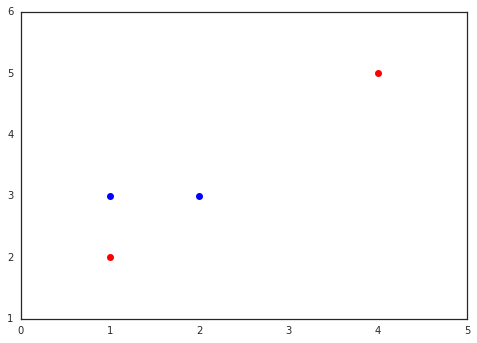

In [281]:
C0 = [X[i] for i in range(len(y)) if y[i] == 0] # C0 for color class 0.
C0_x = [i for (i,j) in C0]
C0_y = [j for (i,j) in C0]
plt.plot(C0_x, C0_y, 'bo')

C1 = [X[i] for i in range(len(y)) if y[i] == 1] # C1 for color class 1.
C1_x = [i for (i,j) in C1]
C1_y = [j for (i,j) in C1]
plt.plot(C1_x, C1_y, 'ro')

x_min = np.min(np.append(C0_x,C1_x)) - 1
x_max = np.max(np.append(C0_x,C1_x)) + 1

y_min = np.min(np.append(C0_y, C1_y)) - 1
y_max = np.max(np.append(C0_y, C1_y)) + 1

plt.axis([x_min, x_max, y_min, y_max])
plt.show()

## Round 1: A larger example

But, hey this was unfair. We trained the model on some training data, and we scored the model off (subsets of) the same dataset? That cannot be right. So, we have to split the data into training and test data.

In [298]:
# template: make_classification(n_samples, n_features, n_informative, n_redundant, n_classes = 2, weights, random_state)
X, y = make_classification(300, 2, 2, 0, weights=[.6, .4], random_state=25)

In [304]:
# Train on 100 of the samples (the training set)
clf = LogisticRegression().fit(X[:150], y[:150])

In the above, change
- n_samples
- weights between the two classes
- random_state

and see the impact on
- accuracy as in clf.score
- plot of the test data.

In [305]:
# Plotting. 
# Check out 
# what xx, len(xx) is
# what np.c_ does

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
acc = clf.score(X[150:], y[150:])
print(acc)

0.886666666667


[(-5, 5),
 (-5, 5),
 None]

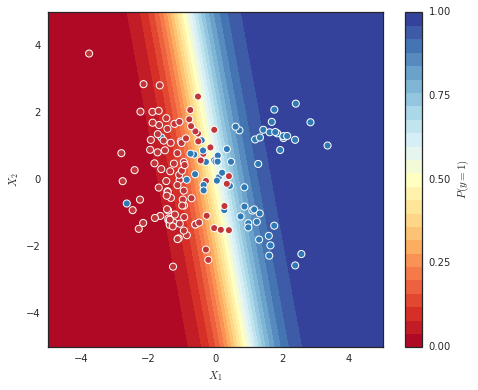

In [306]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdYlBu",
                      vmin=0, vmax=1)

# Set up the contour bar
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot the outputs on the test data.
ax.scatter(X[150:,0], X[150:, 1], c=y[150:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

Credits: 
    http://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
    
All colormaps are at: 

- http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
- http://chrisalbon.com/python/set_the_color_of_a_matplotlib.html

And now, on to more realistic datasets...

Most Python packages come equipped with some sample datasets. For instance the __statsmodels__ package has a whole bunch of datasets as in http://statsmodels.sourceforge.net/devel/datasets/index.html

The next example is based on the following site that uses Fair's data on extramarital affairs, see
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/discrete_choice_example.html

Also see http://nbviewer.jupyter.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976

## Round 2

In [77]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
    Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [78]:
print( sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

Load the dataset using Pandas. Note that this is a Pandas data structure, so we have to use Pandas' methods in order to access the data (say, print the first line of the data table). 

In [79]:
dta = sm.datasets.fair.load_pandas().data 
# Try out print(dta) 
print(dta.head(1))

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   

   occupation_husb   affairs  
0              5.0  0.111111  


__Sidenote__: Here, print dta.head(1) will not work. This is because we imported print as a function, see the line from __future__ import print_function, so print a will not work any more, since this is using print as a statement.

In [80]:
#print(dta['affairs']) 

Note that the affairs column shows the total amount of time spent in affairs. Let us try to classify whether a person will cheat or not. Hence, let us replace all entries where dta['affairs'] > 0 by 1 (rather by 1.0). We can get this by the Boolean expression (dta['affairs']> 0). 

We will make this into a new column, and call the new column "affair"

In [81]:
# (dta['affairs']> 0)
dta['affair'] = (dta['affairs'] > 0).astype(float)

In [82]:
print(dta.head(2))

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111     1.0  
1              4.0  3.230769     1.0  


People who use R will be familiar with the next few steps. We want to "describe" the dataset, i.e. get the most relevant statistics to understand this data. Also the fitting of the model (logit) in this case is quite similar to that in R.

In [83]:
print(dta.describe())

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs       affair  
count  6366.000000  6366.000000      6366.000000  6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374     0.322495  
std       2.178003     0.942399         1.346435     2.203374     0.467468  
min    

In [84]:
affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   "+ rate_marriage + age + yrs_married + children"
                   " + religious", dta).fit()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


Comments about this model: 

Here, "affair" is the independent variable (also called the __target__ variable) whereas the other columns are the dependent variables. 

Note that occupation, occupation_husb are not really __numerical__ variables, but are __categorical__ variables. 
As another example, suppose color-of-car were an independent variable in some predictive model. How do we put a linear ordering on the color-of-car? 

Quiz question: how do we deal with __categorical__ variables?

In [85]:
print(affair_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Jul 2016   Pseudo R-squ.:                  0.1327
Time:                        22:48:17   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000         3.140     4.311
occupation          0.1602      0.034      4.717      0.000         0.094     0.227
educ               -0.0392      

This is a good place to discuss the various parameter values in the results. MLE refers to Maximum Likelihood Estimate that we will cover in detail in our indepth discussion of Logistic Regression later.

To discuss: 
- p-values, 
- Log-Likelihood, 
- Pseudo R-square.

For each, show 
- how to compute
- whether the values above match up.

In [86]:
affair_mod.pred_table()

array([[ 3882.,   431.],
       [ 1326.,   727.]])

The pred_table is also called the __confusion matrix__. Note that the sum of all the entries in this matrix equals the total number of observations (in this example, 6366). 

What do the terms p-value, log-likelihood etc. mean? Details at http://www.ats.ucla.edu/stat/stata/output/stata_logistic.htm


In [87]:
mfx = affair_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
occupation          0.0293      0.006      4.744      0.000         0.017     0.041
educ               -0.0072      0.003     -2.538      0.011        -0.013    -0.002
occupation_husb     0.0023      0.004      0.541      0.589        -0.006     0.010
rate_marriage      -0.1308      0.005    -26.891      0.000        -0.140    -0.121
age                -0.0110      0.002     -5.937      0.000        -0.015    -0.007
yrs_married         0.0201      0.002     10.327      0.000         0.016     0.024
children           -0.0008      0.006     -0.134      0.893        -0.012     0.011
religious          -0.0685      0.006    -11.119      0.000        -0.081    -0.056


In [179]:
# Test on the 500th respondent.

respondent500 = dta.ix[500]
print(respondent500)

rate_marriage       4.000000
age                27.000000
yrs_married         6.000000
children            2.000000
religious           2.000000
educ               12.000000
occupation          2.000000
occupation_husb     2.000000
affairs             1.333333
affair              1.000000
Name: 500, dtype: float64


In [180]:
resp = dict(zip(range(1,9), respondent500[["occupation", "educ",
                                            "occupation_husb", "rate_marriage",
                                            "age", "yrs_married", "children",
                                            "religious"]].tolist()))
resp.update({0 : 1})
print(resp)

{0: 1, 1: 2.0, 2: 12.0, 3: 2.0, 4: 4.0, 5: 27.0, 6: 6.0, 7: 2.0, 8: 2.0}


Here, we added a 0th dimension for the bias, with weight 1. 

In [181]:
affair_mod.predict(respondent500)

array([ 0.26974609])

In [182]:
affair_mod.fittedvalues[500]

-0.99591118901187159

In [183]:
affair_mod.model.cdf(affair_mod.fittedvalues[500])

0.26974608949608736

## Round 3

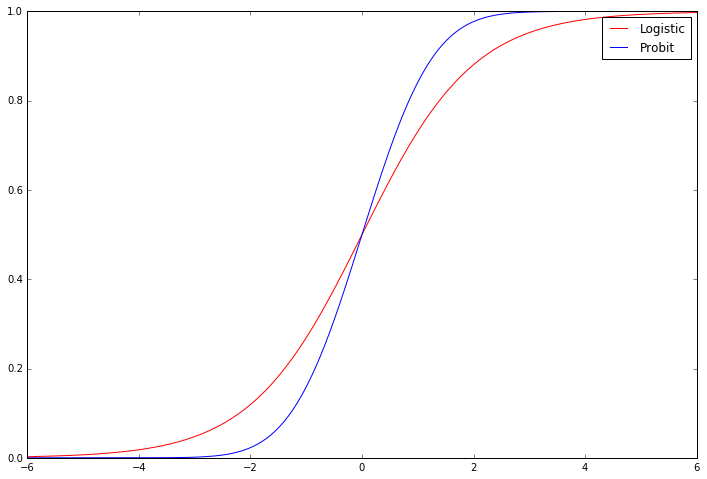

In [93]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();